# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
previsao_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

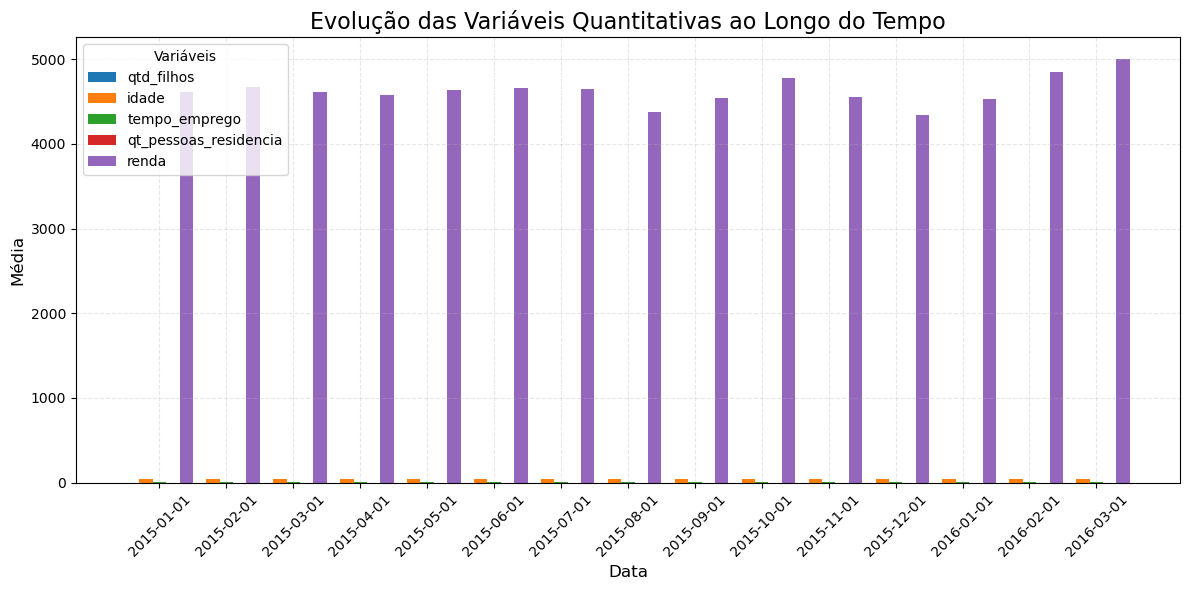

In [4]:
# Selecionar as variáveis quantitativas e a data
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
dados_quantitativos = previsao_renda[['data_ref'] + quantitativas]

# Agrupar os dados por data e calcular a média
dados_agrupados = dados_quantitativos.groupby('data_ref').mean()

# Configurações para o gráfico de barras agrupadas
x = np.arange(len(dados_agrupados.index))  # Posições no eixo x
largura = 0.2  # Largura de cada barra

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as barras para cada variável
for i, coluna in enumerate(quantitativas):
    ax.bar(
        x + i * largura, 
        dados_agrupados[coluna], 
        largura, 
        label=coluna
    )

# Configurar o eixo x para exibir as datas originais
ax.set_xticks(x + largura * (len(quantitativas) - 1) / 2)
ax.set_xticklabels(dados_agrupados.index, rotation=45)

# Configurações adicionais
ax.set_title('Evolução das Variáveis Quantitativas ao Longo do Tempo', fontsize=16)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Média', fontsize=12)
ax.legend(title='Variáveis', loc='upper left')
ax.grid(alpha=0.3, linestyle='--')

# Exibir o gráfico
plt.tight_layout()
plt.show()

A variável renda está em uma escala muito alta e diferente das demais, impossibilitando ver as demais variáveis. Porém, é visto que não ocorre muita variação no tempo da variável renda.

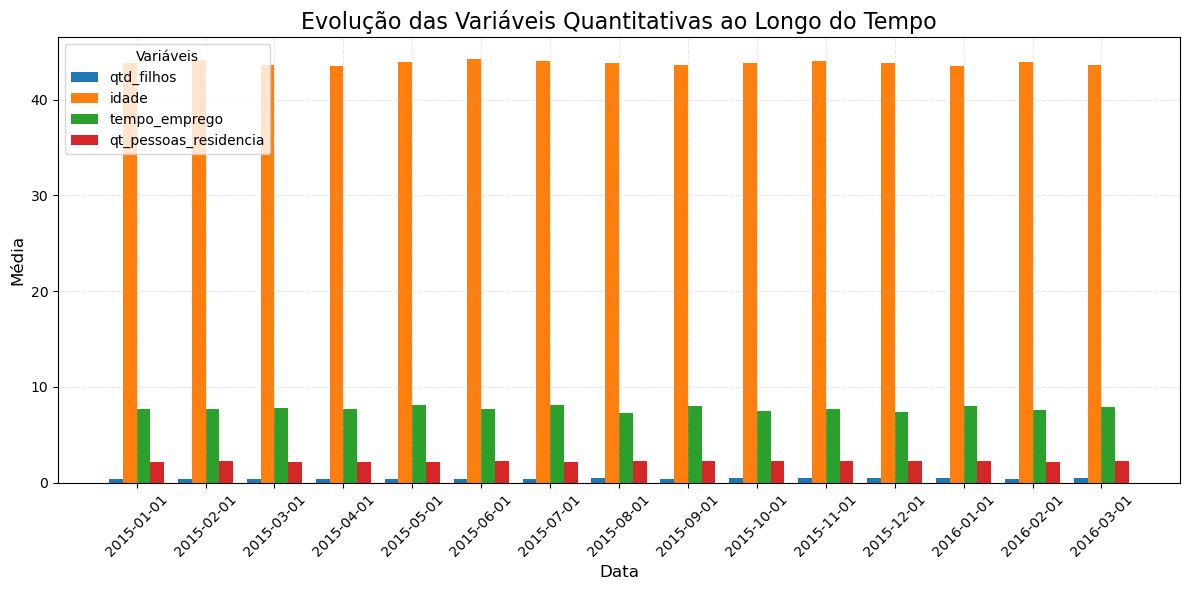

In [5]:
# Selecionar as variáveis quantitativas e a data
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']
dados_quantitativos = previsao_renda[['data_ref'] + quantitativas]

# Agrupar os dados por data e calcular a média
dados_agrupados = dados_quantitativos.groupby('data_ref').mean()

# Configurações para o gráfico de barras agrupadas
x = np.arange(len(dados_agrupados.index))  # Posições no eixo x
largura = 0.2  # Largura de cada barra

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as barras para cada variável
for i, coluna in enumerate(quantitativas):
    ax.bar(
        x + i * largura, 
        dados_agrupados[coluna], 
        largura, 
        label=coluna
    )

# Configurar o eixo x para exibir as datas originais
ax.set_xticks(x + largura * (len(quantitativas) - 1) / 2)
ax.set_xticklabels(dados_agrupados.index, rotation=45)

# Configurações adicionais
ax.set_title('Evolução das Variáveis Quantitativas ao Longo do Tempo', fontsize=16)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Média', fontsize=12)
ax.legend(title='Variáveis', loc='upper left')
ax.grid(alpha=0.3, linestyle='--')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Agora ficou um gráfico melhor de se estudar, mesmo com a variável idade estando também muito acima das demais. Também a média da variável idade não apresenta muita variação ao longo do tempo.

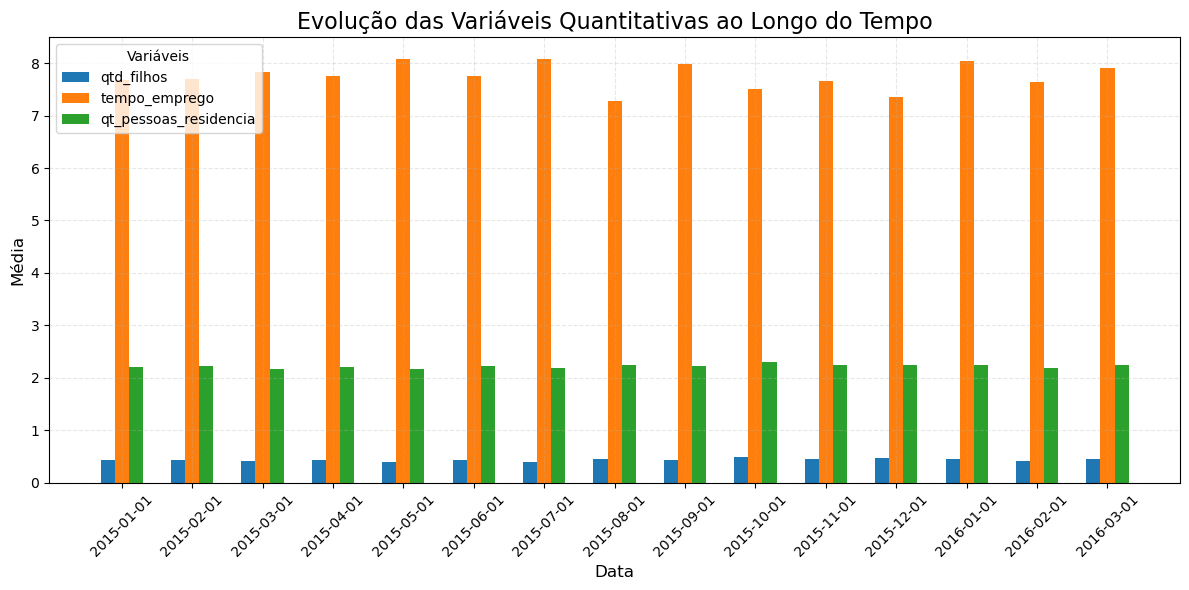

In [6]:
# Selecionar as variáveis quantitativas e a data
quantitativas = ['qtd_filhos', 'tempo_emprego', 'qt_pessoas_residencia']
dados_quantitativos = previsao_renda[['data_ref'] + quantitativas]

# Agrupar os dados por data e calcular a média
dados_agrupados = dados_quantitativos.groupby('data_ref').mean()

# Configurações para o gráfico de barras agrupadas
x = np.arange(len(dados_agrupados.index))  # Posições no eixo x
largura = 0.2  # Largura de cada barra

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as barras para cada variável
for i, coluna in enumerate(quantitativas):
    ax.bar(
        x + i * largura, 
        dados_agrupados[coluna], 
        largura, 
        label=coluna
    )

# Configurar o eixo x para exibir as datas originais
ax.set_xticks(x + largura * (len(quantitativas) - 1) / 2)
ax.set_xticklabels(dados_agrupados.index, rotation=45)

# Configurações adicionais
ax.set_title('Evolução das Variáveis Quantitativas ao Longo do Tempo', fontsize=16)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Média', fontsize=12)
ax.legend(title='Variáveis', loc='upper left')
ax.grid(alpha=0.3, linestyle='--')

# Exibir o gráfico
plt.tight_layout()
plt.show()

O mesmo que foi dito das duas variáveis retiradas anteriores pode ser dito do tempo de emprego.

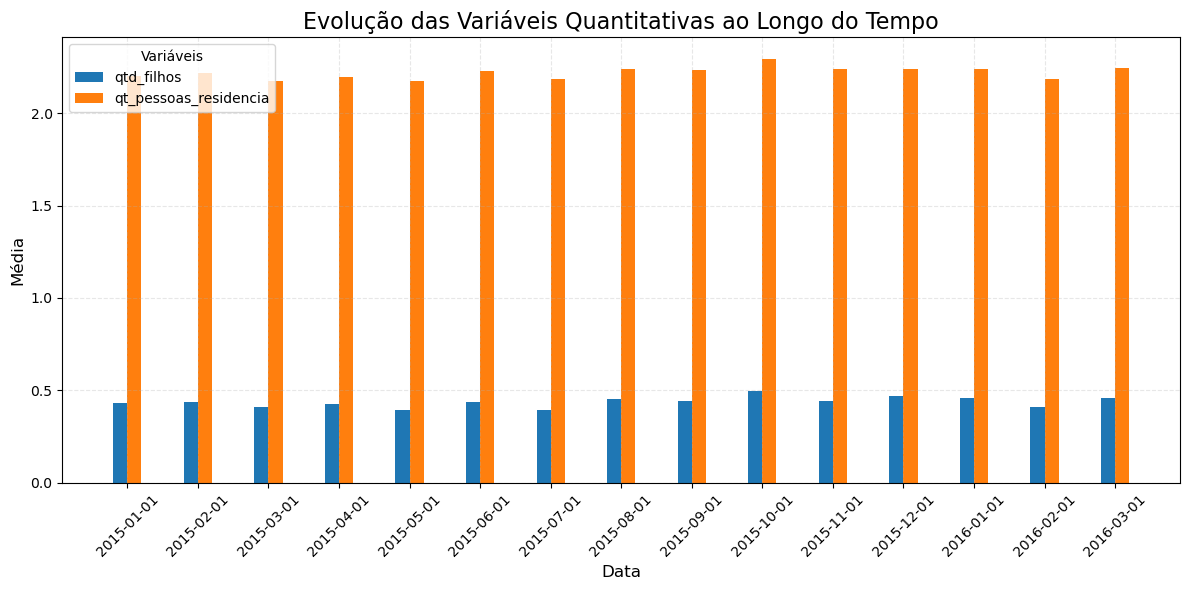

In [7]:
# Selecionar as variáveis quantitativas e a data
quantitativas = ['qtd_filhos', 'qt_pessoas_residencia']
dados_quantitativos = previsao_renda[['data_ref'] + quantitativas]

# Agrupar os dados por data e calcular a média
dados_agrupados = dados_quantitativos.groupby('data_ref').mean()

# Configurações para o gráfico de barras agrupadas
x = np.arange(len(dados_agrupados.index))  # Posições no eixo x
largura = 0.2  # Largura de cada barra

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as barras para cada variável
for i, coluna in enumerate(quantitativas):
    ax.bar(
        x + i * largura, 
        dados_agrupados[coluna], 
        largura, 
        label=coluna
    )

# Configurar o eixo x para exibir as datas originais
ax.set_xticks(x + largura * (len(quantitativas) - 1) / 2)
ax.set_xticklabels(dados_agrupados.index, rotation=45)

# Configurações adicionais
ax.set_title('Evolução das Variáveis Quantitativas ao Longo do Tempo', fontsize=16)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Média', fontsize=12)
ax.legend(title='Variáveis', loc='upper left')
ax.grid(alpha=0.3, linestyle='--')

# Exibir o gráfico
plt.tight_layout()
plt.show()

A mesma análise pode ser vista para as duas variáveis restantes.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

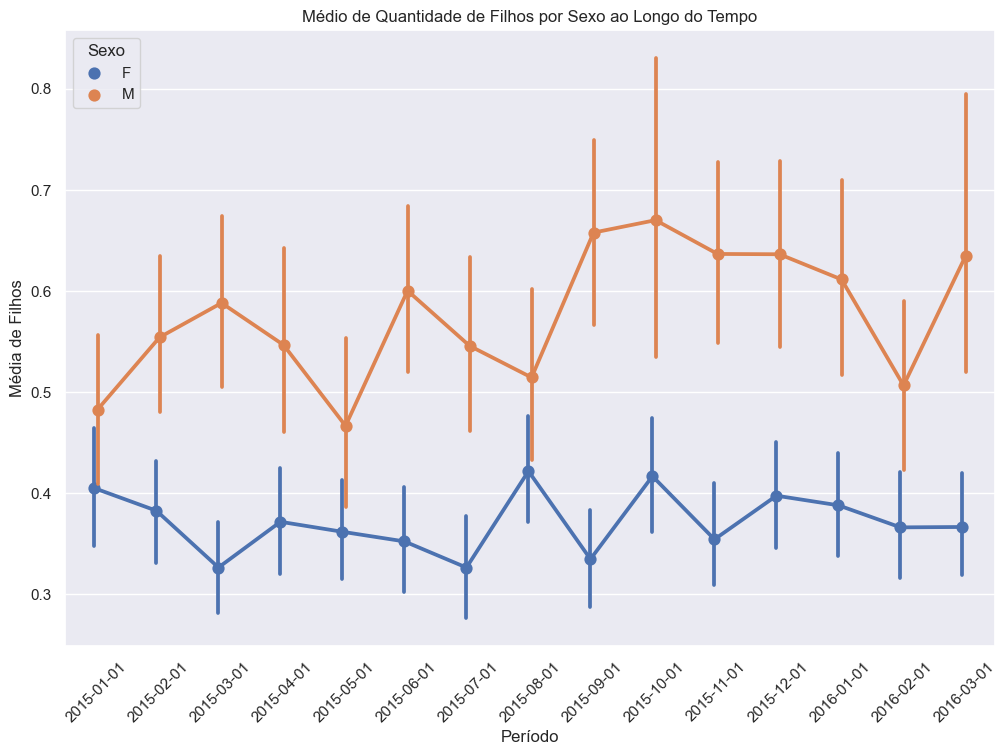

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda, x='data_ref', y='qtd_filhos', hue='sexo', dodge=True)

plt.title('Médio de Quantidade de Filhos por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Filhos')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

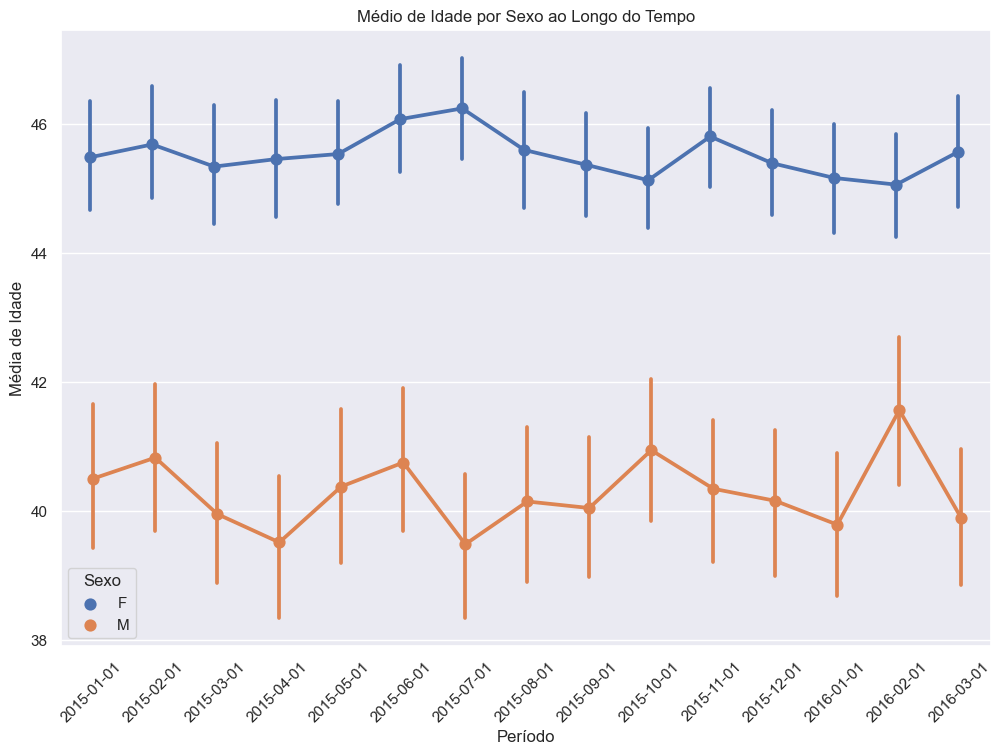

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda, x='data_ref', y='idade', hue='sexo', dodge=True)

plt.title('Médio de Idade por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Idade')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

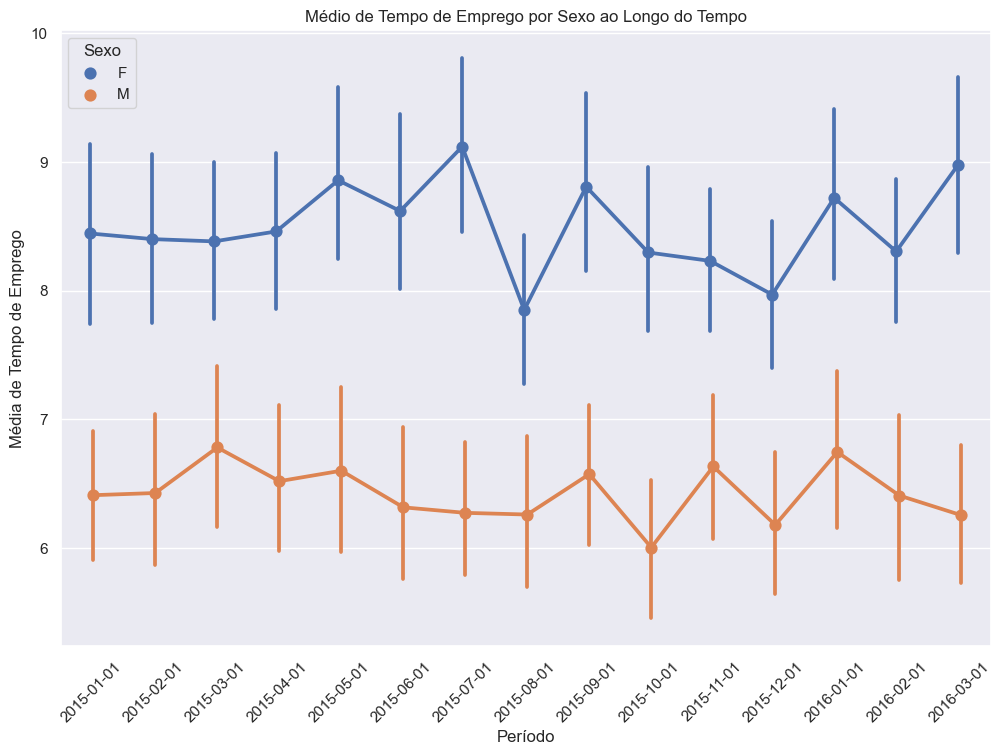

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda, x='data_ref', y='tempo_emprego', hue='sexo', dodge=True)

plt.title('Médio de Tempo de Emprego por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Tempo de Emprego')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

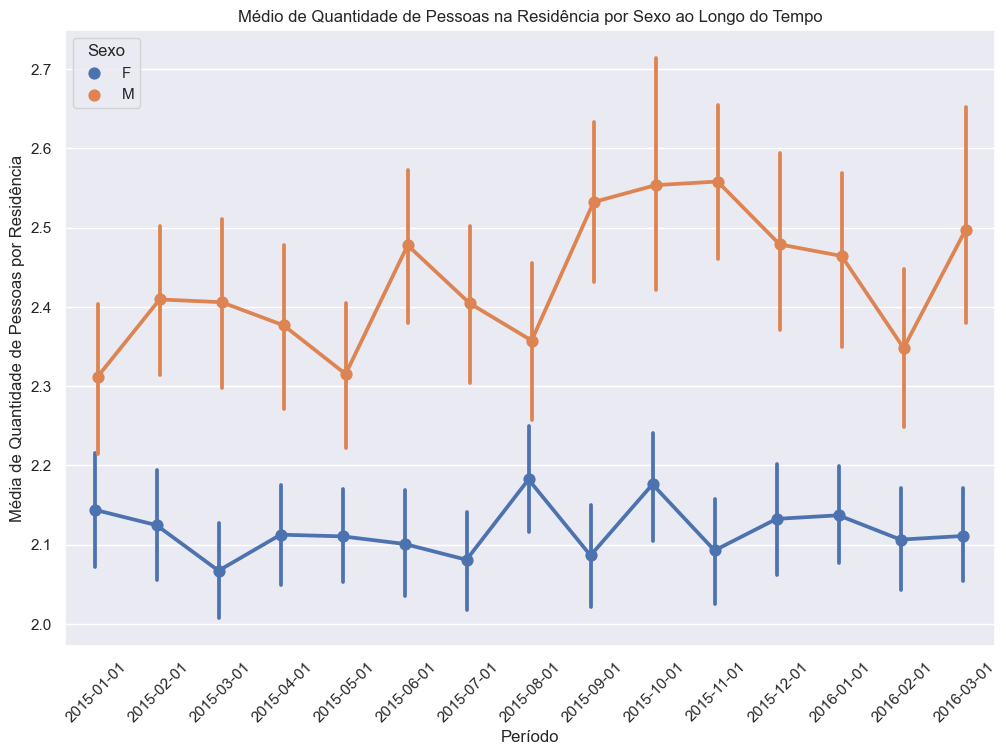

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda, x='data_ref', y='qt_pessoas_residencia', hue='sexo', dodge=True)

plt.title('Médio de Quantidade de Pessoas na Residência por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Quantidade de Pessoas por Residência')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

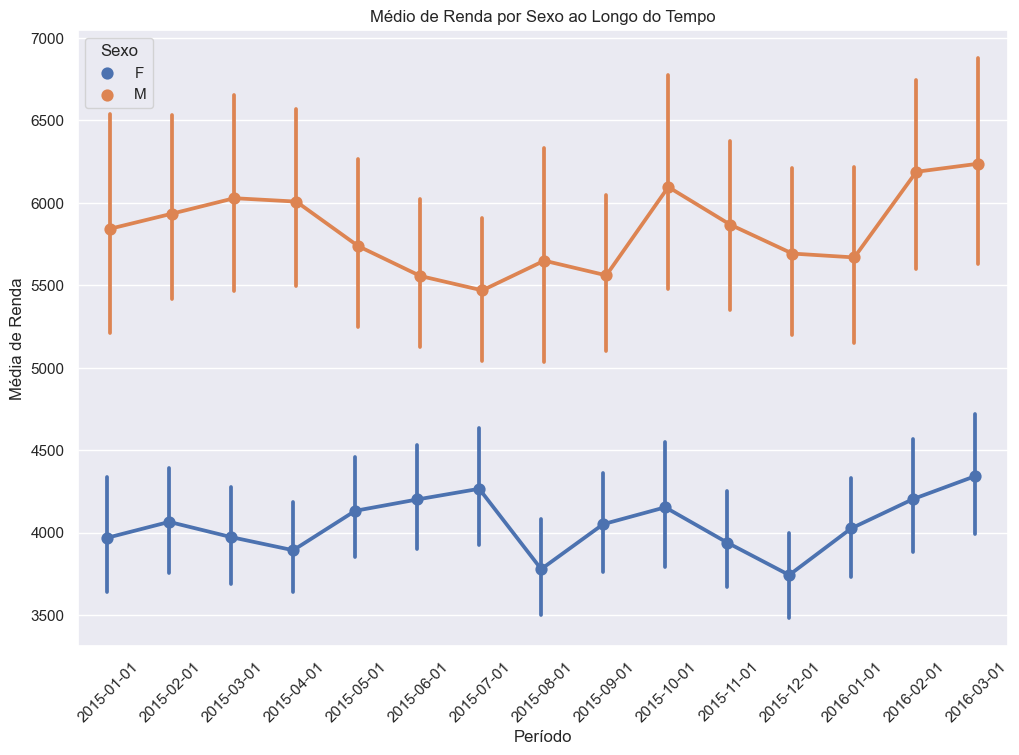

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda, x='data_ref', y='renda', hue='sexo', dodge=True)

plt.title('Médio de Renda por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Renda')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

Quando analisamos a média de todas as variáveis QUANTITATIVAS ao longo do tempo, é interessante notar que anteriormente foi visto que existe correlação do valor da renda entre tempo de emprego e idade, sendo que quanto maior o tempo de emprego e idade, maior tende a ser a renda. O sexo feminino tem as maiores médias nessas duas variáveis em todos os meses nessa base de dados, e ainda assim, em todos os meses, a média de renda do sexo feminino é menor que a renda do sexo masculino.

É importante ressaltar que tempo de emprego existem dados faltantes.

In [13]:
previsao_renda['sexo'].value_counts()

sexo
F    10167
M     4833
Name: count, dtype: int64

In [14]:
(10167/15000)*100

67.78

In [15]:
(4833/15000)*100

32.22

A base é composta por mais de 2/3 de pessoas do sexo feminino. Isso pode ser a razão da média de tempo de emprego e idade de pessoas do sexo feminino ser maior que do masculino, e ainda assim ter uma média de renda menor. Porém, para ter certeza, seria necessário fazer outras análises.

No momento, será realizado os mesmos gráficos, mas excluíndo as linhas com dados faltantes para ver se esse padrão se mantém.

In [16]:
previsao_renda_sem_na = previsao_renda.dropna()
previsao_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [17]:
((12466/15000)*100)-100

-16.893333333333345

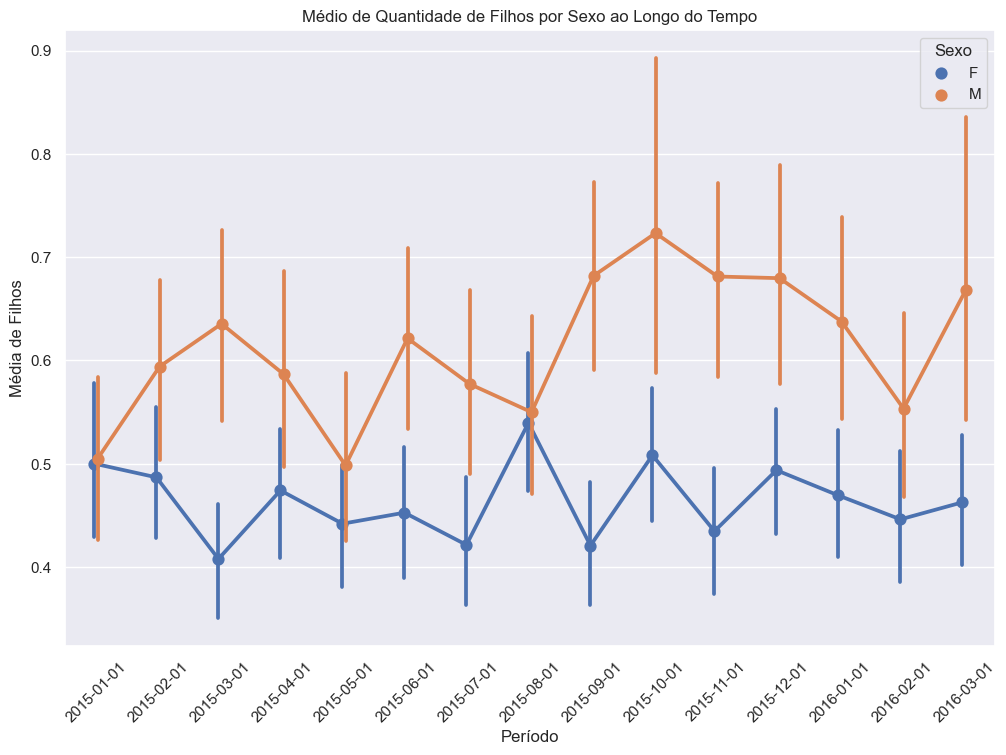

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda_sem_na, x='data_ref', y='qtd_filhos', hue='sexo', dodge=True)

plt.title('Médio de Quantidade de Filhos por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Filhos')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

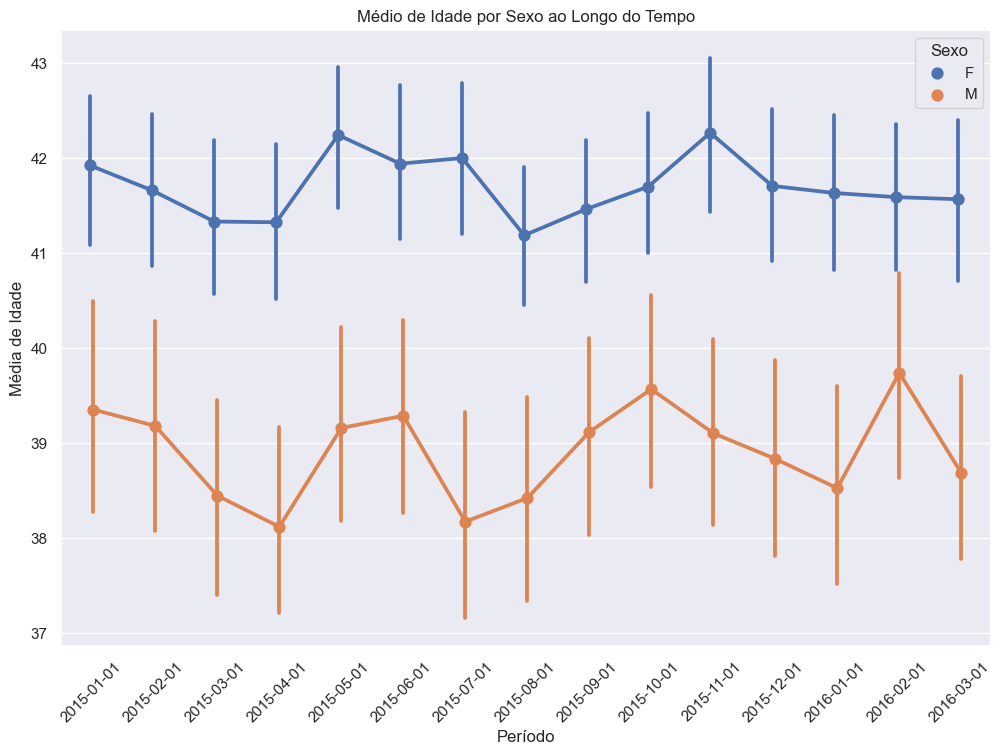

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda_sem_na, x='data_ref', y='idade', hue='sexo', dodge=True)

plt.title('Médio de Idade por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Idade')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

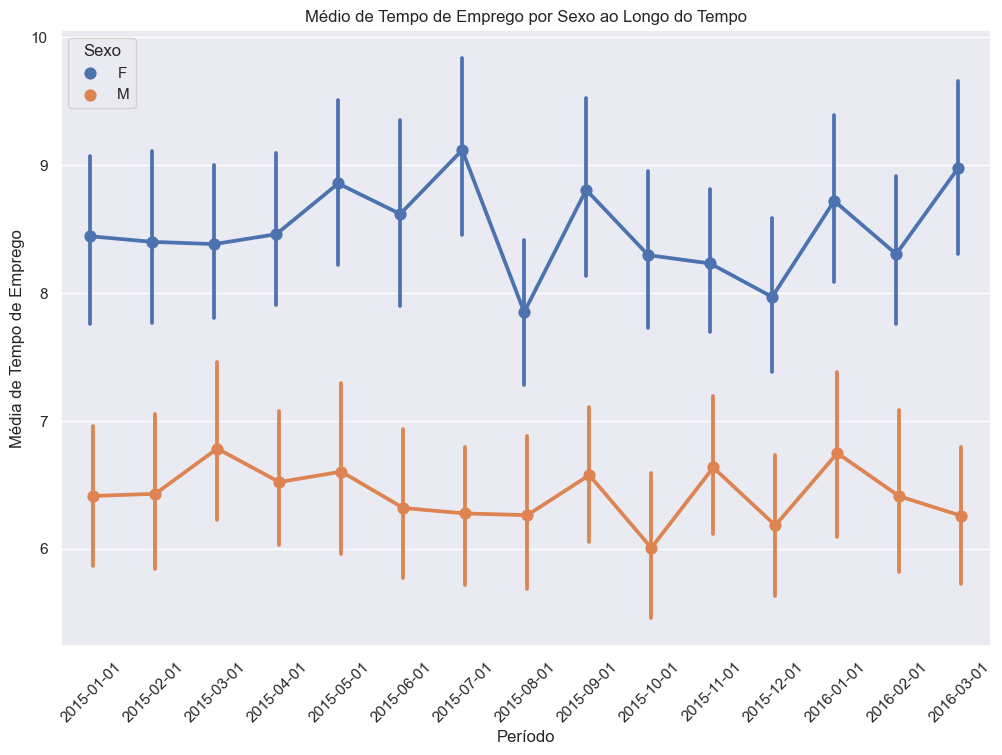

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda_sem_na, x='data_ref', y='tempo_emprego', hue='sexo', dodge=True)

plt.title('Médio de Tempo de Emprego por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Tempo de Emprego')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

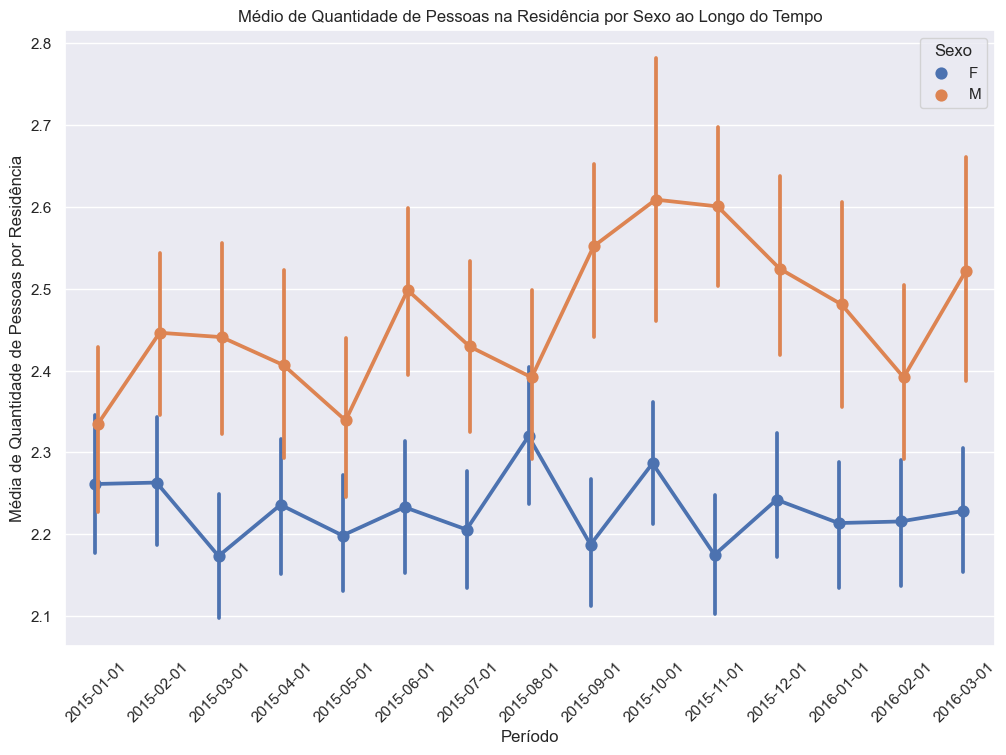

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda_sem_na, x='data_ref', y='qt_pessoas_residencia', hue='sexo', dodge=True)

plt.title('Médio de Quantidade de Pessoas na Residência por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Quantidade de Pessoas por Residência')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

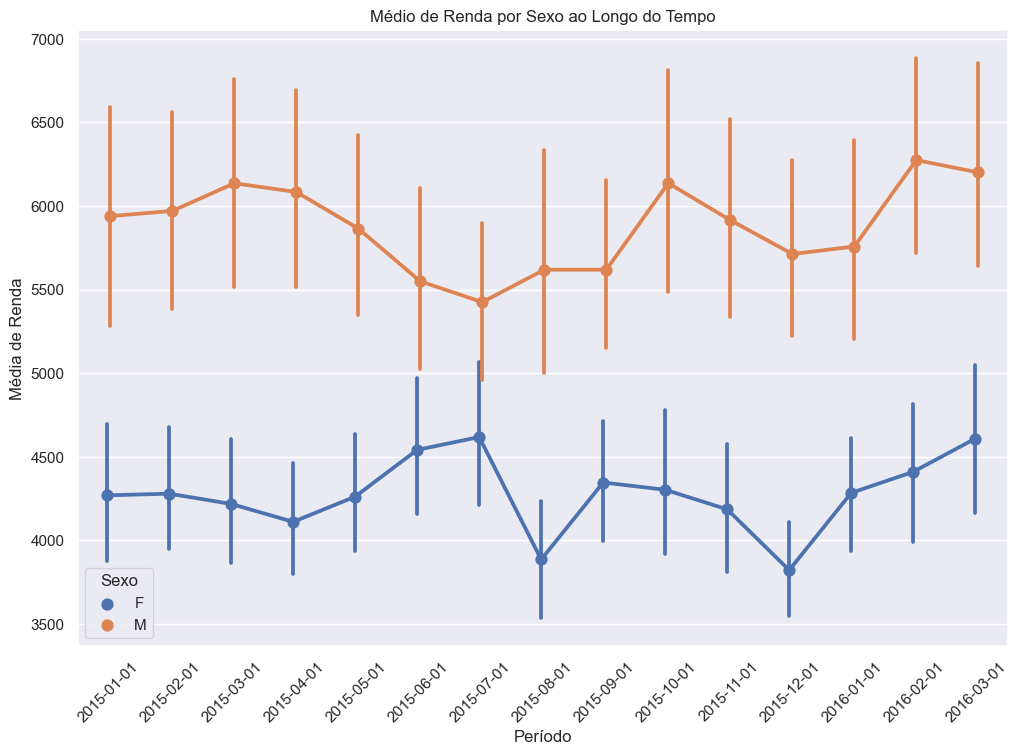

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))

sns.pointplot(data=previsao_renda_sem_na, x='data_ref', y='renda', hue='sexo', dodge=True)

plt.title('Médio de Renda por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Média de Renda')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()

Era esperado alguma alteração nas médias das variáveis, uma vez que foi removido quase 17% de sua base. Porém, não foi alterado qual dos sexos tinha maior média no tempo em cada variável vista.

As análises nesse caso, foram feitas levados em consideração a renda. Não foram feitas análises quanto a serem maus ou bons pagadores.